# Import Library

In [1252]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import jarque_bera
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [1176]:
df = pd.read_csv('fifa_players.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15936\1666935474.py:1: DtypeWarning: Columns (4,5,19,20,21,22,23,25,26,27,28,29,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,48,50,51,52,54,55,56,57,58,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa_players.csv')


In [1177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353198 entries, 0 to 353197
Data columns (total 82 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        353198 non-null  int64  
 1   date_id                   353198 non-null  int64  
 2   player_name               353198 non-null  object 
 3   Age                       353198 non-null  int64  
 4   Overall rating            353198 non-null  object 
 5   Potential                 353198 non-null  object 
 6   name                      353198 non-null  object 
 7   Height                    353198 non-null  int64  
 8   Weight                    353198 non-null  int64  
 9   foot                      353198 non-null  object 
 10  Best overall              353198 non-null  int64  
 11  Best position             353198 non-null  object 
 12  Growth                    353198 non-null  int64  
 13  Joined                    353198 non-null  o

# Pre-processing

In [1178]:
df['Best position'].unique()

array(['/players?pn=25', '/players?pn=14', '/players?pn=10',
       '/players?pn=0', '/players?pn=18', '/players?pn=5',
       '/players?pn=27', '/players?pn=23', '/players?pn=21',
       '/players?pn=16', '/players?pn=12', '/players?pn=7',
       '/players?pn=3', '/players?pn=8', '/players?pn=2'], dtype=object)

25 = ST;
0 = GK;
14 = CM;
10 = CDM;
18 = CF;
5 = CB;
27 = LWF;
23 = RWF;
21 = ST/CF;
16 = RW/RM;
12 = RM;
7 = LB;
3 = RB;
8 = LWB;
2 = RWB;

In [1179]:
position_mapping = {
    '/players?pn=25': 'ST',
    '/players?pn=0': 'GK',
    '/players?pn=14': 'CM',
    '/players?pn=10': 'CDM',
    '/players?pn=18': 'CF',
    '/players?pn=5': 'CB',
    '/players?pn=27': 'LWF',
    '/players?pn=23': 'RWF',
    '/players?pn=21': 'ST/CF',
    '/players?pn=16': 'RW/RM',
    '/players?pn=12': 'RM',
    '/players?pn=7': 'LB',
    '/players?pn=3': 'RB',
    '/players?pn=8': 'LWB',
    '/players?pn=2': 'RWB'
}
df['Position'] = df['Best position'].map(position_mapping)
df['Position'].unique()

array(['ST', 'CM', 'CDM', 'GK', 'CF', 'CB', 'LWF', 'RWF', 'ST/CF',
       'RW/RM', 'RM', 'LB', 'RB', 'LWB', 'RWB'], dtype=object)

In [1180]:
def calculate_overall_rating(rating):
    # Kiểm tra nếu rating là số
    if isinstance(rating, int):
        return rating
    if '+' in rating:
        base_value, change = rating.split('+')
        return int(base_value)  # Cộng giá trị
    elif '-' in rating:
        base_value, change = rating.split('-')
        return int(base_value)  # Trừ giá trị
    else:
        return int(rating)

In [1181]:
df['Overall rating'] = df['Overall rating'].apply(calculate_overall_rating)

print(df['Overall rating'].unique())

[91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68
 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 45]


In [1182]:
df['Potential'] = df['Potential'].apply(calculate_overall_rating)
print(df['Potential'].unique())

[94 91 90 89 92 88 87 93 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49]


In [1183]:
df['Finishing'] = df['Finishing'].apply(calculate_overall_rating)
print(df['Finishing'].unique())

[96 94 85 70 95 14 93 89 29 13 92 52 83 91 87 78 11 90 79 10 64 12 72 15
 68 82 59 56 81 84 48 86 75 55 69 16 76 35 47 26 67 37 80 66 40 54 62 88
 65  6 49 23 50 33 53 43 51 77 71 24 74 46 39 36 32 45 30 63 38 73 42 31
 19 17 61 60  9 25 57  5 58 20 34  8 44 27 18 41 22 21  4 28  7  3]


In [1184]:
df['Heading accuracy'] = df['Heading accuracy'].apply(calculate_overall_rating)
print(df['Heading accuracy'].unique())

[83 73 55 81 89 13 91 60 87 50 29 59 11 63 90 69 86 54 14 15 85 42 72 84
 12 17 88 70 25 49 62 45 65 47 61 43 53 67 56 26 16 58 75 80 82 74 18 35
 76 78 48 77 79 10 52 64 68 28 71 51 20 57 44 41 40 19 23 66 46 37 38 30
 36 39 24 93  9  7 33 34  8 32 31 22  5 27 21  6]


In [1185]:
df['Short passing'] = df['Short passing'].apply(calculate_overall_rating)
print(df['Short passing'].unique())

[77 86 94 92 87 33 84 91 83 80 60 85 61 89 75 65 43 90 39 71 36 88 82 76
 78 57 32 79 38 40 72 58 69 73 42 81 74 50 54 67 35 25 29 30 62 48 20 55
 49 63 70 66 28 26 45 27 44 34 37 68 64 11 18 51 31 23 59 53 24 22 21 41
 15 52 19 47 56 17 14 16 46 13 12 10]


In [1186]:
df['Volleys'] = df['Volleys'].apply(calculate_overall_rating)
print(df['Volleys'].unique())

[90 84 83 59 89 12 86 32 72 20 45 14 88 74 70 91 78 18 13 10 50  8 79 16
 69 87 35 76 11 38 56 64 34 68 80 62 63 75 82 67 66 28 17 77 60 71 44 58
 43  7 24 55 15 46 48 57 49 61 27 51 73 52 40 81 33 47 65 25 53 31 42 39
 54 41 85 21 19 37  9 23 29 36 30  5 26  6 22  4]


In [1187]:
df['Dribbling'] = df['Dribbling'].apply(calculate_overall_rating)
print(df['Dribbling'].unique())

[79 93 86 81 82 13 96 64 92 27 88 70 21 95 87 83 85 30 12 24 28 31 78 69
 84 94 55 90 89 17 11 80 77 74 72 73 54 20 76 15 22 62 57 65 61 19 59 67
 63 18 60 68 26 52 14 10 75 56 71 16 48 66 51 47 58 45 25 35  9 50  8 44
 34 53 40 49 46 41 23 42 37 43 29 32 39 38  7 33 36  5  6  4  3]


In [1188]:
df['Acceleration'] = df['Acceleration'].apply(calculate_overall_rating)
print(df['Acceleration'].unique())

[82 97 74 59 67 42 76 87 54 95 60 89 66 45 88 81 84 83 78 64 38 68 50 80
 77 85 75 48 94 86 73 62 72 56 65 51 55 92 61 79 71 69 96 91 58 90 40 70
 52 53 33 47 93 57 44 35 43 41 49 63 31 46 34 36 37 24 28 30 32 39 27 25
 26 29 20 23 15 17 18 16 19 21 22 14 12]


In [1189]:
df['Sprint speed'] = df['Sprint speed'].apply(calculate_overall_rating)
print(df['Sprint speed'].unique())

[94 97 74 65 71 52 75 69 95 49 89 87 50 85 77 80 91 68 63 53 92 55 83 82
 88 70 86 76 78 93 79 66 57 59 60 47 48 64 37 54 72 90 84 67 46 73 61 81
 39 45 38 51 34 40 42 56 44 62 36 30 33 41 58 96 43 35 32 18 25 20 31 29
 24 28 26 23 27 22 15 17 16 21 19]


In [1190]:
df['Agility'] = df['Agility'].apply(calculate_overall_rating)
print(df['Agility'].unique())

[78 93 76 65 66 63 77 91 60 94 40 89 59 39 82 88 95 64 87 37 55 57 85 41
 84 68 81 92 51 56 86 70 90 73 62 75 79 83 49 50 71 47 69 72 52 74 36 45
 54 67 42 53 80 34 61 48 38 46 58 43 32 20 44 35 21 31 33 30 29 22 27 23
 26 25 28 24 13 17 18 16]


In [1191]:
df['Balance'] = df['Balance'].apply(calculate_overall_rating)
print(df['Balance'].unique())

[72 82 78 67 73 45 83 95 56 84 37 91 50 43 79 68 89 92 48 86 29 65 38 76
 74 35 55 90 88 80 62 81 63 49 77 51 71 61 59 57 47 87 85 58 53 70 40 69
 42 33 52 75 66 34 64 93 54 44 39 30 60 26 24 31 25 46 20 36 41 94 28 32
 21 27 23 22 19 96]


In [1192]:
df['Shot power'] = df['Shot power'].apply(calculate_overall_rating)
print(df['Shot power'].unique())

[94 90 92 93 57 91 83 74 76 64 82 81 67 79 87 89 85 68 59 75 55 78 86 65
 88 73 80 62 84 60 48 50 72 71 58 77 51 56 42 69 37 63 52 54 61 53 45 40
 70 66 47 49 27 44 46 29 43 41 34 36 35 38 32 33 25 28 31 26 30 39 20 23
 21 24 22 19 18]


In [1193]:
df['Stamina'] = df['Stamina'].apply(calculate_overall_rating)
print(df['Stamina'].unique())

[76 88 89 81 38 70 78 84 32 87 72 35 80 93 44 42 86 83 30 91 39 85 95 43
 79 77 68 94 73 74 40 82 75 45 90 71 92 69 37 64 65 53 63 28 67 59 58 61
 54 29 31 34 60 36 55 52 50 27 66 62 33 23 25 26 19 41 49 57 56 21 51 24
 20 22 48 18 47 17 15 46 16 14 13]


In [1194]:
df['Strength'] = df['Strength'].apply(calculate_overall_rating)
print(df['Strength'].unique())

[93 77 75 83 84 70 89 68 90 65 78 51 80 54 69 53 81 79 86 74 56 60 64 58
 87 73 63 47 52 67 62 57 88 72 76 59 66 71 91 61 82 85 95 44 40 92 94 38
 49 55 39 42 45 46 35 41 50 34 32 33 43 48 36 37 31 30 96 29 25 22 26 28
 23 27]


In [1195]:
st_players = df[df['Position'] == 'ST']

selected_columns_st = [
    'player_name', 'Age', 'Height', 'Weight', 'foot', 'Weak foot', 'Skill moves',
    'Overall rating', 'Potential', 'Best overall', 'Best position',
    'Total attacking', 'Finishing', 'Heading accuracy', 'Short passing', 'Volleys',
    'Total skill', 'Dribbling',
    'Total movement', 'Acceleration', 'Sprint speed', 'Agility', 'Balance',
    'Total power', 'Shot power', 'Stamina', 'Strength', 'Number of playstyles'
]

st_players = st_players[selected_columns_st]

In [1196]:
st_players.drop(columns='Best position', inplace=True)
st_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49247 entries, 0 to 353191
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   player_name           49247 non-null  object
 1   Age                   49247 non-null  int64 
 2   Height                49247 non-null  int64 
 3   Weight                49247 non-null  int64 
 4   foot                  49247 non-null  object
 5   Weak foot             49247 non-null  int64 
 6   Skill moves           49247 non-null  int64 
 7   Overall rating        49247 non-null  int64 
 8   Potential             49247 non-null  int64 
 9   Best overall          49247 non-null  int64 
 10  Total attacking       49247 non-null  int64 
 11  Finishing             49247 non-null  int64 
 12  Heading accuracy      49247 non-null  int64 
 13  Short passing         49247 non-null  int64 
 14  Volleys               49247 non-null  int64 
 15  Total skill           49247 non-null  in

In [1197]:
st_players['foot'].unique()

array(['Left', 'Right'], dtype=object)

In [1198]:
st_players = pd.get_dummies(st_players, columns=['foot'], prefix='foot')
st_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49247 entries, 0 to 353191
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   player_name           49247 non-null  object
 1   Age                   49247 non-null  int64 
 2   Height                49247 non-null  int64 
 3   Weight                49247 non-null  int64 
 4   Weak foot             49247 non-null  int64 
 5   Skill moves           49247 non-null  int64 
 6   Overall rating        49247 non-null  int64 
 7   Potential             49247 non-null  int64 
 8   Best overall          49247 non-null  int64 
 9   Total attacking       49247 non-null  int64 
 10  Finishing             49247 non-null  int64 
 11  Heading accuracy      49247 non-null  int64 
 12  Short passing         49247 non-null  int64 
 13  Volleys               49247 non-null  int64 
 14  Total skill           49247 non-null  int64 
 15  Dribbling             49247 non-null  in

In [1199]:
st_players['foot_Left'] = st_players['foot_Left'].astype(int)
st_players['foot_Right'] = st_players['foot_Right'].astype(int)

st_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49247 entries, 0 to 353191
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   player_name           49247 non-null  object
 1   Age                   49247 non-null  int64 
 2   Height                49247 non-null  int64 
 3   Weight                49247 non-null  int64 
 4   Weak foot             49247 non-null  int64 
 5   Skill moves           49247 non-null  int64 
 6   Overall rating        49247 non-null  int64 
 7   Potential             49247 non-null  int64 
 8   Best overall          49247 non-null  int64 
 9   Total attacking       49247 non-null  int64 
 10  Finishing             49247 non-null  int64 
 11  Heading accuracy      49247 non-null  int64 
 12  Short passing         49247 non-null  int64 
 13  Volleys               49247 non-null  int64 
 14  Total skill           49247 non-null  int64 
 15  Dribbling             49247 non-null  in

In [1200]:
st_players.to_csv('st_players.csv', index=False)

In [1201]:
st_players.describe()

,Age,Height,Weight,Weak foot,Skill moves,Overall rating,Potential,Best overall,Total attacking,Finishing,...,Sprint speed,Agility,Balance,Total power,Shot power,Stamina,Strength,Number of playstyles,foot_Left,foot_Right
count,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,...,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000,49247.000000
mean,24.709444,183.648425,77.528865,3.118078,2.594737,65.523605,70.844722,66.810851,296.808719,67.090665,...,70.398806,65.486832,63.680996,337.250107,67.521981,63.958860,71.006518,0.872926,0.160396,0.839604
std,4.872782,5.959309,6.554073,0.651902,0.571880,6.642742,6.093572,6.375562,38.142559,7.205581,...,10.260363,9.889487,11.227340,37.511204,8.369447,10.284268,11.102714,1.222021,0.366976,0.366976
min,16.000000,160.000000,55.000000,1.000000,2.000000,47.000000,51.000000,49.000000,190.000000,41.000000,...,29.000000,29.000000,28.000000,208.000000,43.000000,24.000000,25.000000,0.000000,0.000000,0.000000
25%,21.000000,180.000000,73.000000,3.000000,2.000000,61.000000,67.000000,63.000000,272.000000,62.000000,...,65.000000,59.000000,57.000000,314.000000,62.000000,57.000000,64.000000,0.000000,0.000000,1.000000
50%,24.000000,184.000000,77.000000,3.000000,3.000000,65.000000,71.000000,67.000000,296.000000,67.000000,...,71.000000,66.000000,65.000000,340.000000,68.000000,64.000000,72.000000,0.000000,0.000000,1.000000
75%,28.000000,188.000000,82.000000,3.000000,3.000000,70.000000,75.000000,71.000000,322.000000,72.000000,...,77.000000,72.000000,71.000000,364.000000,73.000000,71.000000,79.000000,1.000000,0.000000,1.000000
max,41.000000,206.000000,101.000000,5.000000,5.000000,91.000000,94.000000,93.000000,440.000000,96.000000,...,97.000000,93.000000,93.000000,442.000000,94.000000,94.000000,96.000000,8.000000,1.000000,1.000000


# Visual

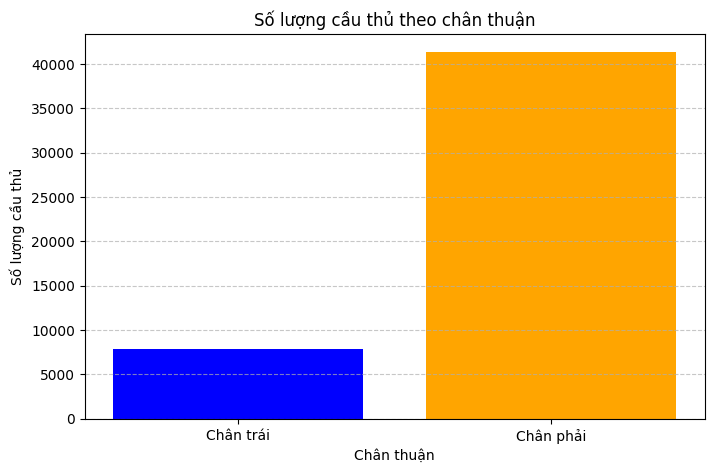

In [1202]:
foot_counts = st_players[['foot_Left', 'foot_Right']].sum()

plt.figure(figsize=(8, 5))
plt.bar(foot_counts.index, foot_counts.values, color=['blue', 'orange'])
plt.title('Số lượng cầu thủ theo chân thuận')
plt.xlabel('Chân thuận')
plt.ylabel('Số lượng cầu thủ')
plt.xticks(ticks=[0, 1], labels=['Chân trái', 'Chân phải'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [1203]:
st_players = st_players[(st_players['Overall rating'] <= 86)]

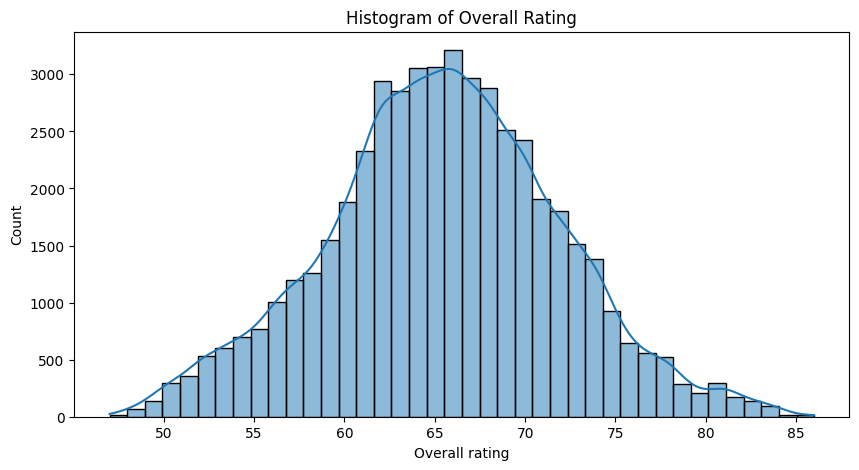

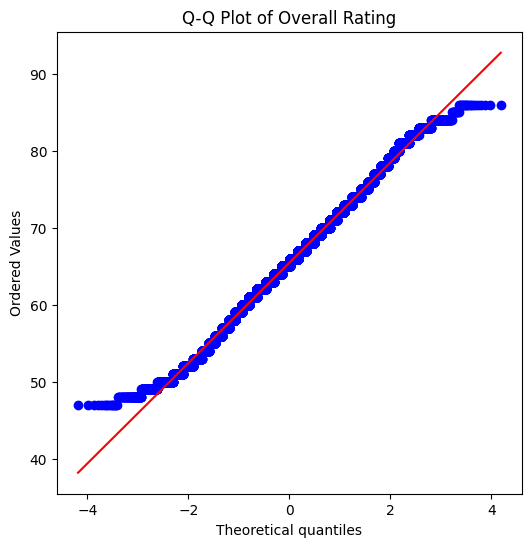

In [1204]:
plt.figure(figsize=(10, 5))
sns.histplot(st_players['Overall rating'],bins = 40, kde=True)
plt.title('Histogram of Overall Rating')
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(st_players['Overall rating'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Overall Rating')
plt.show()


In [ ]:
jb_statistic, p_value = stats.jarque_bera(st_players['Overall rating'])

print(f"JB Statistic: {jb_statistic}")
print(f"P-value: {p_value}")

JB Statistic: 5.802259948439867
P-value: 0.054961080350990205


H0: Không có sự khác biệt đáng kể giữa trung bình của 2 nhóm
H1: Có sự khác biệt đáng kể giữa trung bình của 2 nhóm

In [1217]:
left_footers = st_players[st_players['foot_Left'] == 1]['Overall rating']
right_footers = st_players[st_players['foot_Right'] == 1]['Overall rating']

t_statistic, p_value = stats.ttest_ind(left_footers, right_footers, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 4.607130825055766
P-value: 4.1277253904631494e-06


C:\Users\Admin\AppData\Local\Temp\ipykernel_15936\309028361.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_footers, label='Left Foot', shade=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15936\309028361.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(right_footers, label='Right Foot', shade=True)


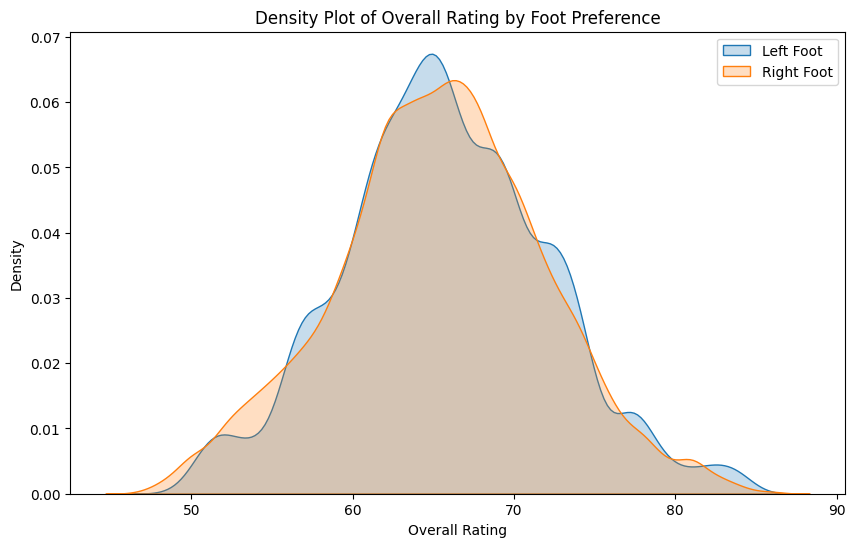

In [ ]:
left_footers = st_players[st_players['foot_Left'] == 1]['Overall rating']
right_footers = st_players[st_players['foot_Right'] == 1]['Overall rating']

plt.figure(figsize=(10, 6))
sns.kdeplot(left_footers, label='Left Foot', shade=True)
sns.kdeplot(right_footers, label='Right Foot', shade=True)
plt.title('Density Plot of Overall Rating by Foot Preference')
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

H0: Chiều cao trung bình của cầu thủ là 180 cm
H1: Chiều cao trung bình của cầu thủ khác 180 cm

In [1243]:
height_data = st_players['Height']

t_stat, p_value = stats.ttest_1samp(height_data, 180)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 135.6726514049426
P-value: 0.0


In [1248]:
correlation_coefficient, p_value = stats.pearsonr(st_players['Finishing'], st_players['Overall rating'])

print("Hệ số tương quan Pearson:", correlation_coefficient)
print("p-value:", p_value)

Hệ số tương quan Pearson: 0.9163359118807434
p-value: 0.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_15936\3235680997.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


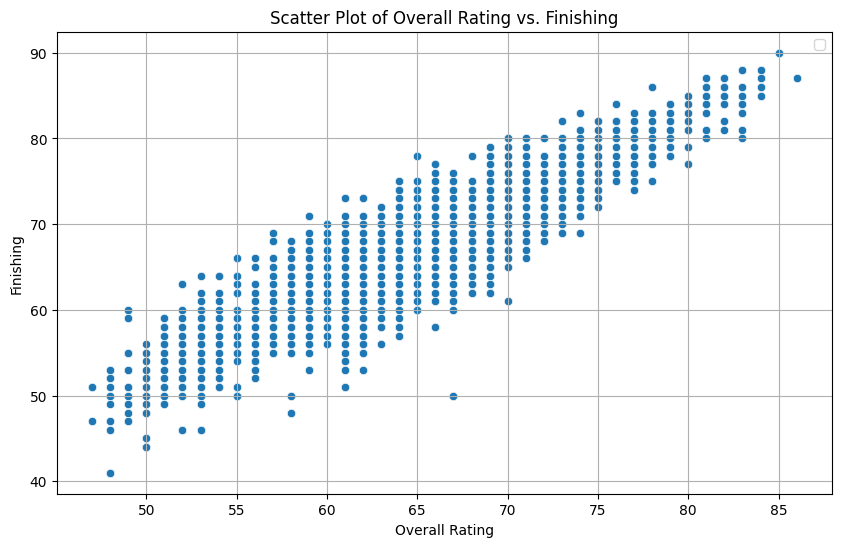

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=st_players, x='Overall rating', y='Finishing')
plt.title('Scatter Plot of Overall Rating vs. Finishing')
plt.xlabel('Overall Rating')
plt.ylabel('Finishing')
plt.legend()
plt.grid()
plt.show()

# Modeling

In [ ]:
X = st_players[['Age', 'Height', 'Weight', 'Weak foot', 'Skill moves', 
                 'Potential', 'Total attacking', 'Finishing', 
                 'Heading accuracy', 'Short passing', 'Volleys', 
                 'Total skill', 'Dribbling', 'Total movement', 
                 'Acceleration', 'Sprint speed', 'Agility', 
                 'Balance', 'Total power', 'Shot power', 
                 'Stamina', 'Strength', 'Number of playstyles', 
                 'foot_Left', 'foot_Right']]
y = st_players['Overall rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.45096231560738265
R^2 Score: 0.9893221255158199
